<a href="https://colab.research.google.com/github/vrhughes/DS3001Group/blob/development/wc_matches_cleaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/vrhughes/DS3001Group

# Import packages:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Accessing and viewing the data
path = './DS3001Group/Data/wc_matches.csv'
df = pd.read_csv(path, low_memory=False)
df.head()

Cloning into 'DS3001Group'...
remote: Enumerating objects: 128, done.
remote: Counting objects: 100% (128/128), done.
remote: Compressing objects: 100% (120/120), done.
remote: Total 128 (delta 43), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (128/128), 1.46 MiB | 6.77 MiB/s, done.
Resolving deltas: 100% (43/43), done.


,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2022-11-20,1908,FIFA World Cup,Qatar,Ecuador,51.00,72.74,0.2369,0.5045,0.2586,1.13,1.75,0,2,0.23,1.14,0.24,1.35,0.00,2.10
1,2022-11-21,1908,FIFA World Cup,England,Iran,85.96,62.17,0.6274,0.1187,0.2539,1.70,0.58,6,2,1.04,1.45,1.50,0.32,5.78,2.10
2,2022-11-21,1908,FIFA World Cup,Senegal,Netherlands,73.84,86.01,0.2235,0.5053,0.2712,0.99,1.63,0,2,0.70,0.68,1.22,1.83,0.00,1.58
3,2022-11-21,1908,FIFA World Cup,USA,Wales,74.83,65.58,0.4489,0.2591,0.2920,1.42,1.01,1,1,0.33,1.78,0.48,0.95,1.05,1.05
4,2022-11-22,1908,FIFA World Cup,Argentina,Saudi Arabia,87.21,56.87,0.7228,0.0807,0.1966,2.11,0.54,1,2,1.63,0.15,2.40,0.53,1.05,2.10


First, I am going to add a column to show the winner or if the match ended in a tie.

In [4]:
def determine_winner(row):
    if row['score1'] > row['score2']:
        return row['team1']
    elif row['score1'] < row['score2']:
        return row['team2']
    else:
        return 'Tie'

df['Winner'] = df.apply(determine_winner, axis=1)

df.head()


,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,Result,Winner
0,2022-11-20,1908,FIFA World Cup,Qatar,Ecuador,51.00,72.74,0.2369,0.5045,0.2586,...,0,2,0.23,1.14,0.24,1.35,0.00,2.10,Ecuador,Ecuador
1,2022-11-21,1908,FIFA World Cup,England,Iran,85.96,62.17,0.6274,0.1187,0.2539,...,6,2,1.04,1.45,1.50,0.32,5.78,2.10,England,England
2,2022-11-21,1908,FIFA World Cup,Senegal,Netherlands,73.84,86.01,0.2235,0.5053,0.2712,...,0,2,0.70,0.68,1.22,1.83,0.00,1.58,Netherlands,Netherlands
3,2022-11-21,1908,FIFA World Cup,USA,Wales,74.83,65.58,0.4489,0.2591,0.2920,...,1,1,0.33,1.78,0.48,0.95,1.05,1.05,Tie,Tie
4,2022-11-22,1908,FIFA World Cup,Argentina,Saudi Arabia,87.21,56.87,0.7228,0.0807,0.1966,...,1,2,1.63,0.15,2.40,0.53,1.05,2.10,Saudi Arabia,Saudi Arabia


Now, I want to drop the columns that I will not be using which are xg, nsxg, and adj_score.

In [12]:
drops= ['xg1','xg2','nsxg1','nsxg2','adj_score1','adj_score2']
df = df.drop(drops, axis=1)

df.head()


,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,score1,score2,Result,Winner,predicted_winner,actual_winner
0,2022-11-20,1908,FIFA World Cup,Qatar,Ecuador,51.00,72.74,0.2369,0.5045,0.2586,1.13,1.75,0,2,Ecuador,Ecuador,2,2
1,2022-11-21,1908,FIFA World Cup,England,Iran,85.96,62.17,0.6274,0.1187,0.2539,1.70,0.58,6,2,England,England,1,1
2,2022-11-21,1908,FIFA World Cup,Senegal,Netherlands,73.84,86.01,0.2235,0.5053,0.2712,0.99,1.63,0,2,Netherlands,Netherlands,2,2
3,2022-11-21,1908,FIFA World Cup,USA,Wales,74.83,65.58,0.4489,0.2591,0.2920,1.42,1.01,1,1,Tie,Tie,1,2
4,2022-11-22,1908,FIFA World Cup,Argentina,Saudi Arabia,87.21,56.87,0.7228,0.0807,0.1966,2.11,0.54,1,2,Saudi Arabia,Saudi Arabia,1,2


Now, I want to create a bar graph that can show me how many times the predicted winner actually won the match

In [8]:
df['predicted_winner'] = df.apply(lambda row: 1 if row['prob1'] > row['prob2'] else 2, axis=1)
df['actual_winner'] = df.apply(lambda row: 1 if row['score1'] > row['score2'] else 2, axis=1)

correct_predictions = df[df['predicted_winner'] == df['actual_winner']].shape[0]
incorrect_predictions = df.shape[0] - correct_predictions

# Create a DataFrame for plotting
results = pd.DataFrame({
    'Outcome': ['Correct Predictions', 'Incorrect Predictions'],
    'Count': [correct_predictions, incorrect_predictions]
})



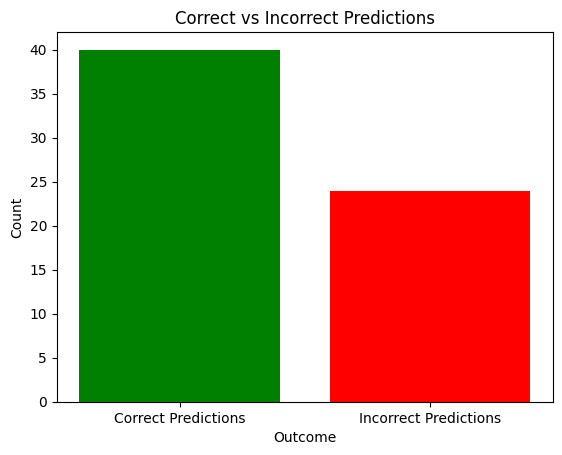

In [9]:
# Plotting
plt.bar(results['Outcome'], results['Count'], color=['green', 'red'])
plt.title('Correct vs Incorrect Predictions')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()